In [1]:
import joblib
import pandas as pd
from quadratic_weighted_kappa import quadratic_weighted_kappa
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
scores = pd.read_csv('../training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
y =  joblib.load('score_asap8')
model_score = joblib.load('score_model_normalized')

In [3]:
scores = scores[scores['essay_set'] == 8]
scores = scores[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']]
len(scores)

723

In [4]:
scores

,rater1_domain1,rater2_domain1,rater3_domain1
12255,18,16,NaN
12256,21,26,46.0
12257,15,20,40.0
12258,12,20,30.0
12259,11,15,NaN
...,...,...,...
12973,17,18,NaN
12974,15,17,NaN
12975,20,26,40.0
12976,20,20,NaN


### Check how many rater3 involved (measuring disagreement between rater 1 and rater 2)

In [5]:
scores.count()

rater1_domain1    723
rater2_domain1    723
rater3_domain1    128
dtype: int64

### first reset dataframe index to avoid NaN

In [6]:
scores = scores.reset_index()

In [7]:
#scores = scores[['rater1_domain1', 'rater2_domain1']]
scores['model_score'] = model_score
scores['y'] = y
scores

,index,rater1_domain1,rater2_domain1,rater3_domain1,model_score,y
0,12255,18,16,NaN,31.0,34
1,12256,21,26,46.0,42.0,46
2,12257,15,20,40.0,38.0,40
3,12258,12,20,30.0,32.0,30
4,12259,11,15,NaN,31.0,26
...,...,...,...,...,...,...
718,12973,17,18,NaN,38.0,35
719,12974,15,17,NaN,36.0,32
720,12975,20,26,40.0,44.0,40
721,12976,20,20,NaN,40.0,40


In [26]:
quadratic_weighted_kappa(y, model_score)

0.668321316220708

In [27]:
pearsonr(y, model_score)

(0.7095107461378246, 1.0714193875947459e-111)

In [28]:
quadratic_weighted_kappa(scores['rater1_domain1'], scores['rater2_domain1'])

0.6291121945431986

In [29]:
pearsonr(scores['rater1_domain1'], scores['rater2_domain1'])

(0.6306088057600147, 2.009789652900671e-81)

In [8]:
rater1_score = scores['rater1_domain1']
rater2_score = scores['rater2_domain1']

In [31]:
print(y)

0      34
1      46
2      40
3      30
4      26
       ..
718    35
719    32
720    40
721    40
722    40
Name: domain1_score, Length: 723, dtype: int64


In [33]:
discrepancy_r1r2 = rater1_score == rater2_score
type(discrepancy_r1r2)

pandas.core.series.Series

In [34]:
diff = rater1_score - rater2_score
diff_abs = list(map(abs, diff))
diff

0      2
1     -5
2     -5
3     -8
4     -4
      ..
718   -1
719   -2
720   -6
721    0
722    0
Length: 723, dtype: int64

In [35]:
diff_abs[-5:]

[1, 2, 6, 0, 0]

In [36]:
scores['diff_r1r2'] = diff_abs
scores

,index,rater1_domain1,rater2_domain1,rater3_domain1,model_score,y,diff_r1r2
0,12255,18,16,NaN,31.0,34,2
1,12256,21,26,46.0,42.0,46,5
2,12257,15,20,40.0,38.0,40,5
3,12258,12,20,30.0,32.0,30,8
4,12259,11,15,NaN,31.0,26,4
...,...,...,...,...,...,...,...
718,12973,17,18,NaN,38.0,35,1
719,12974,15,17,NaN,36.0,32,2
720,12975,20,26,40.0,44.0,40,6
721,12976,20,20,NaN,40.0,40,0


In [37]:
diff_y_model = model_score - y
diff_y_model_abs = list(map(abs, diff_y_model))
diff_y_model

0     -3.0
1     -4.0
2     -2.0
3      2.0
4      5.0
      ... 
718    3.0
719    4.0
720    4.0
721    0.0
722    0.0
Name: domain1_score, Length: 723, dtype: float64

In [38]:
diff_y_model_abs = list(map(int, diff_y_model_abs))
diff_y_model_abs[-3:]

[4, 0, 0]

In [39]:
scores['diff_model_y'] = diff_y_model_abs
scores

,index,rater1_domain1,rater2_domain1,rater3_domain1,model_score,y,diff_r1r2,diff_model_y
0,12255,18,16,NaN,31.0,34,2,3
1,12256,21,26,46.0,42.0,46,5,4
2,12257,15,20,40.0,38.0,40,5,2
3,12258,12,20,30.0,32.0,30,8,2
4,12259,11,15,NaN,31.0,26,4,5
...,...,...,...,...,...,...,...,...
718,12973,17,18,NaN,38.0,35,1,3
719,12974,15,17,NaN,36.0,32,2,4
720,12975,20,26,40.0,44.0,40,6,4
721,12976,20,20,NaN,40.0,40,0,0


In [52]:
scores.to_excel('asap8_summary.xlsx')

In [41]:
diff_r1r2 = list(scores['diff_r1r2'])
diff_model_y = list(scores['diff_model_y'])

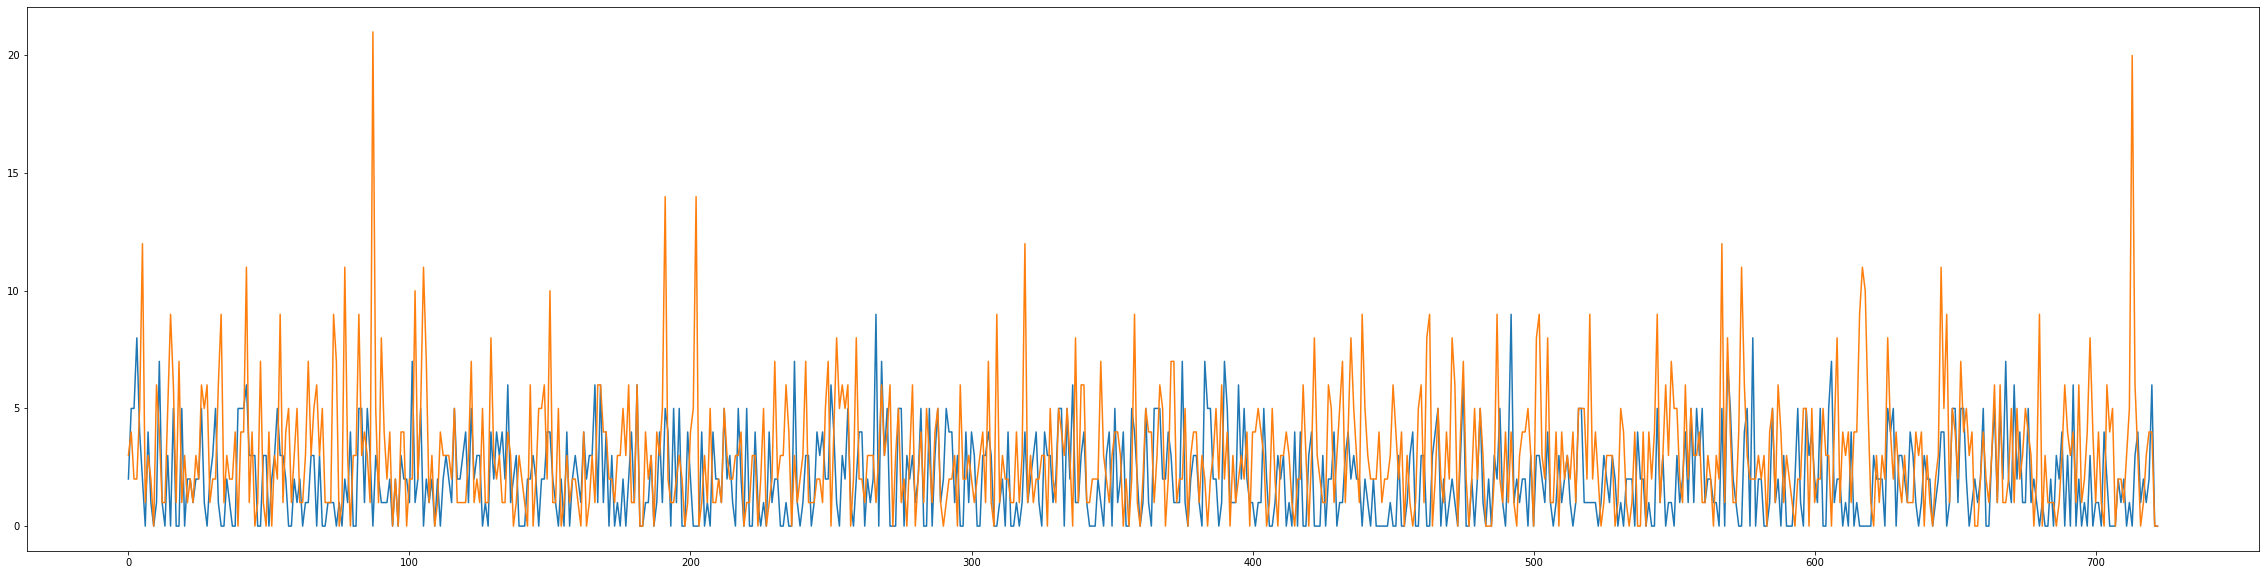

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
plt.plot(diff_r1r2)
plt.plot(diff_model_y)
plt.show()

In [43]:
diff = np.array(diff_r1r2) - np.array(diff_model_y)
diff_abs = list(map(abs,diff))
diff

array([ -1,   1,   3,   6,  -1, -10,  -1,   1,  -1,   0,  -5,   3,   0,
        -1,  -2,  -9,  -1,  -1,  -7,   4,  -3,   1,   0,   0,  -1,   0,
        -1,  -4,  -6,   1,   1,   3,  -5,  -9,  -1,  -1,  -1,  -2,  -4,
         5,   1,   1,  -5,   2,  -1,   3,  -1,  -7,   2,   3,  -4,   2,
         0,   3,  -6,   2,  -2,  -5,  -1,  -1,  -4,   1,  -1,  -2,  -6,
         0,  -2,  -6,   0,  -5,  -1,   0,   0,  -8,  -7,   1,  -1,  -9,
        -2,   4,  -3,  -3,  -4,   2,  -3,   2,   2, -21,  -2,   1,  -7,
        -3,  -1,  -2,   0,   0,   0,  -1,  -2,   2,  -1,   5,  -9,   0,
         0, -11,  -5,   0,  -1,   0,   1,  -4,  -1,   0,  -1,  -1,   0,
         1,   1,   2,   3,  -2,  -2,   1,   1,   2,  -5,   0,  -1,  -4,
        -1,   2,   0,   3,   1,   2,  -2,   2,   2,  -3,  -2,  -1,   2,
        -4,   3,   0,  -5,  -3,  -4,   2,  -6,   1,   0,  -5,   2,  -1,
         1,  -1,   0,   1,   1,   1,   0,   2,   2,   0,   5,  -5,   0,
        -3,   0,  -2,   1,  -1,  -2,  -3,  -3,  -3,  -4,   3,   

In [44]:
diff_abs[-3:]

[2, 0, 0]

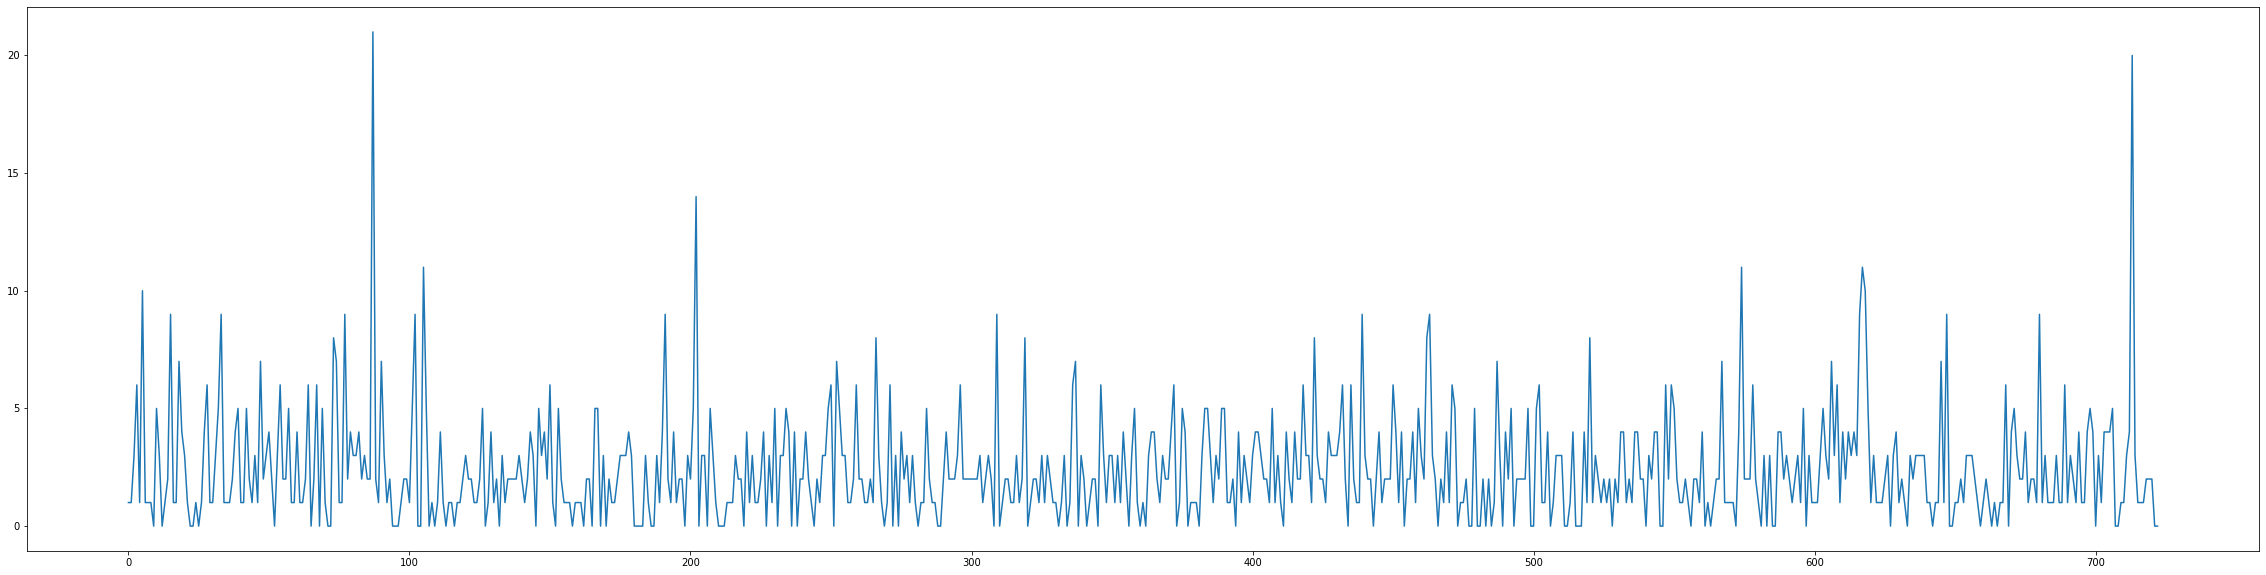

In [45]:
plt.figure(figsize=(40,10))
plt.plot(diff_abs)
plt.show()

In [46]:
from collections import Counter
Counter(diff_abs)

Counter({1: 191,
         3: 105,
         6: 25,
         10: 2,
         0: 117,
         5: 40,
         2: 145,
         9: 11,
         7: 10,
         4: 65,
         8: 6,
         21: 1,
         11: 3,
         14: 1,
         20: 1})

In [47]:
bad_scores = scores[scores['diff_model_y'] != 0]
good_scores = scores[scores['diff_model_y'] == 0]

In [48]:
bad_scores

,index,rater1_domain1,rater2_domain1,rater3_domain1,model_score,y,diff_r1r2,diff_model_y
0,12255,18,16,NaN,31.0,34,2,3
1,12256,21,26,46.0,42.0,46,5,4
2,12257,15,20,40.0,38.0,40,5,2
3,12258,12,20,30.0,32.0,30,8,2
4,12259,11,15,NaN,31.0,26,4,5
...,...,...,...,...,...,...,...,...
715,12970,24,20,NaN,41.0,44,4,3
717,12972,17,15,30.0,31.0,30,2,1
718,12973,17,18,NaN,38.0,35,1,3
719,12974,15,17,NaN,36.0,32,2,4


In [49]:
Counter(bad_scores['diff_r1r2'])

Counter({2: 115, 5: 69, 8: 2, 4: 54, 0: 172, 1: 135, 7: 9, 3: 72, 6: 10, 9: 2})

In [50]:
good_scores

,index,rater1_domain1,rater2_domain1,rater3_domain1,model_score,y,diff_r1r2,diff_model_y
9,12264,20,20,NaN,40.0,40,0,0
39,12294,25,20,NaN,45.0,45,5,0
45,12300,15,18,NaN,33.0,33,3,0
49,12304,18,15,NaN,33.0,33,3,0
51,12306,20,18,36.0,36.0,36,2,0
...,...,...,...,...,...,...,...,...
703,12958,20,16,NaN,36.0,36,4,0
707,12962,20,20,NaN,40.0,40,0,0
716,12971,18,17,NaN,35.0,35,1,0
721,12976,20,20,NaN,40.0,40,0,0


In [51]:
Counter(good_scores['diff_r1r2'])

Counter({0: 29, 5: 2, 3: 14, 2: 17, 1: 12, 4: 6, 6: 2, 7: 1})

# NOT FINISHED YET !

## Passing, Borderline, Failing
#### Human (0-30)
#### 0-13 failing
#### 14-16 bordeline
#### 17-30 passing
#### Model (0-60)
#### 0-27 failing
#### 28-32 bordeline
#### 33-60 passing


In [94]:
# Score rater : 0-12, resolved score : rater1 + rater 2 : 0 - 24

In [95]:
print(Counter(rater1_score))

Counter({20: 245, 15: 113, 17: 74, 18: 73, 16: 46, 19: 30, 25: 27, 21: 22, 23: 19, 22: 14, 13: 13, 10: 10, 14: 9, 12: 8, 11: 6, 24: 6, 30: 3, 27: 2, 26: 1, 28: 1, 5: 1})


In [97]:
rater1_score.value_counts()

20    245
15    113
17     74
18     73
16     46
19     30
25     27
21     22
23     19
22     14
13     13
10     10
14      9
12      8
11      6
24      6
30      3
27      2
26      1
28      1
5       1
Name: rater1_domain1, dtype: int64

In [96]:
r1 = dict(Counter(rater1_score))

rater1_score_passing = 0
rater1_score_borderline = 0
rater1_score_failing = 0

for i in range(0,14):
    rater1_score_passing = rater1_score_passing + rater1_score[i]

print(rater1_score_passing)

for i in range(14,17):
    rater1_score_borderline = rater1_score_borderline + rater1_score[i]

print(rater1_score_borderline)

for i in range(17,31):
    rater1_score_failing = rater1_score_failing + rater1_score[i]
print(rater1_score_failing)
# rater1_score_passing = r1[7] + r1[8] + r1[9] + r1[10] + r1[11] + r1[12]
# rater1_score_borderline = r1[6]
# rater1_score_failing = r1[0] + r1[1] + r1[2] + r1[3] + r1[4] + r1[5]

total = rater1_score_passing + rater1_score_borderline + rater1_score_failing
total

245
53
246


544

In [48]:
print(Counter(rater2_score))

Counter({8: 432, 12: 213, 9: 173, 6: 153, 4: 130, 7: 120, 11: 106, 10: 99, 5: 99, 3: 34, 2: 5, 1: 3, 0: 2})


In [49]:
r2 = dict(Counter(rater2_score))

rater2_score_passing = r2[7] + r2[8] + r2[9] + r2[10] + r2[11] + r2[12]
rater2_score_borderline = r2[6]
rater2_score_failing = r2[0] + r2[1] + r2[2] + r2[3] + r2[4] + r2[5]

total = rater2_score_passing + rater2_score_borderline + rater2_score_failing
total

1569

In [51]:
print(Counter(model_score))

Counter({16.0: 179, 19.0: 156, 15.0: 154, 17.0: 153, 14.0: 125, 20.0: 121, 18.0: 117, 13.0: 102, 11.0: 87, 21.0: 84, 12.0: 77, 10.0: 62, 22.0: 54, 9.0: 31, 23.0: 29, 8.0: 14, 24.0: 12, 7.0: 6, 6.0: 5, 5.0: 1})


In [54]:
# failing 0-11
# borderline 12
# passaing 13-24

In [58]:
m = dict(Counter(model_score))

model_score_passing = m[13] + m[14] + m[15] + m[16] + m[17] + m[18] + m[19] + m[20] + m[21] + m[22] + m[23] + m[24]
model_score_borderline = m[12]
model_score_failing = m[5] + m[6] + m[7] + m[8] + m[9] + m[10] + m[11]

total = model_score_passing + model_score_borderline + model_score_failing
total

1569

In [59]:
print("Passing")
print("rater1_score: ", rater1_score_passing)
print("rater2_score: ", rater2_score_passing)
print("model_score: ", model_score_passing)

Passing
rater1_score:  1161
rater2_score:  1143
model_score:  1286


In [60]:
print("Borderline")
print("rater1_score: ", rater1_score_borderline)
print("rater2_score: ", rater2_score_borderline)
print("model_score: ", model_score_borderline)

Borderline
rater1_score:  139
rater2_score:  153
model_score:  77


In [61]:
print("Failing")
print("rater1_score: ", rater1_score_failing)
print("rater2_score: ", rater2_score_failing)
print("model_score: ", model_score_failing)

Failing
rater1_score:  269
rater2_score:  273
model_score:  206


## Quantitative Assessment of AES Model

## z must be lower than 0.15

In [9]:
human1_score = np.array(rater1_score)
human2_score = np.array(rater2_score)

In [10]:
human2_score

array([16, 26, 20, 20, 15, 18, 20, 19, 20, 20, 15, 16, 16, 18, 20, 10, 25,
       20, 15, 20, 20, 20, 18, 16, 20, 17, 25, 15, 15, 16, 18, 18, 24, 15,
       20, 17, 20, 15, 20, 20, 25, 25, 26, 18, 18, 18, 17, 20, 18, 15, 20,
       18, 17, 20, 15, 20, 20, 20, 20, 18, 16, 22, 20, 18, 17, 18, 15, 15,
       17, 20, 20, 18, 17, 16, 20, 19, 18, 15, 16, 17, 16, 15, 25, 20, 20,
       25, 18, 30, 21, 15, 24, 16, 15, 18, 20, 18, 20, 12, 11, 15, 16, 14,
       16, 18, 20, 15, 23, 15, 17, 20, 17, 20, 20, 23, 18, 20, 25, 19, 18,
       17, 16, 15, 15, 18, 18, 20, 20, 18, 20, 12, 20, 16, 23, 19, 17, 25,
       19, 20, 20, 18, 20, 15, 15, 21, 20, 20, 20, 18, 13, 19, 20, 20, 17,
       17, 17, 20, 19, 20, 20, 17, 20, 15, 19, 15, 20, 17, 19, 14, 12, 23,
       16, 20, 16, 20, 21, 20, 15, 20, 20, 19, 16, 14, 20, 20, 15, 15, 23,
       20, 20, 20, 15,  5, 22, 18, 25, 18, 25, 20, 20, 20, 13, 20, 10, 18,
       25, 16, 20, 22, 16, 22, 22, 15, 25, 15, 23, 15, 18, 15, 18, 20, 25,
       20, 19, 16, 18, 15

In [14]:
model_mean = np.mean(model_score)
print(model_mean)
y_mean = np.mean(y)
print(y_mean)
mean_diff = abs(model_mean-y_mean)
print(mean_diff)

37.023513139695716
36.95020746887967
0.07330567081604755


In [15]:
model_variance = np.var(model_score)
print(model_variance)
y_variance = np.var(y)
print(y_variance)

16.44896303820909
33.05699511601614


In [16]:
z = mean_diff / np.sqrt((model_variance + y_variance)/2)
z

0.01473410752696293

## Statistics

### mean

In [39]:
print("Mean Human-1 score: ", np.mean(human1_score))
print("Mean Human-2 score: ", np.mean(human2_score))
print("Mean model score: ", np.mean(model_score))
print("Mean label: ", np.mean(y))

Mean Human-1 score:  18.338865836791147
Mean Human-2 score:  18.55739972337483
Mean model score:  37.023513139695716
Mean label:  36.95020746887967


### Standard Deviation

In [40]:
print("SD Human-1 score: ", np.std(human1_score))
print("SD Human-2 score: ", np.std(human2_score))
print("SD model score: ", np.std(model_score))
print("SD label: ", np.std(y))

SD Human-1 score:  3.1679537029257996
SD Human-2 score:  3.168475404999768
SD model score:  4.055732121110699
SD label:  5.7495212945093215


### summary

In [41]:
scores.describe()

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,18.338866,18.557400,37.023513,36.950207,1.991701,3.085754
std,3.170147,3.170669,4.058540,5.753502,1.871180,2.628599
min,5.000000,5.000000,24.000000,10.000000,0.000000,0.000000
25%,16.000000,16.000000,34.000000,33.000000,0.000000,1.000000
50%,19.000000,19.000000,37.000000,37.000000,2.000000,3.000000
75%,20.000000,20.000000,40.000000,40.000000,3.000000,4.000000
max,30.000000,30.000000,52.000000,60.000000,9.000000,21.000000


### ANOVA test

In [42]:
# Test if data have the same means
from scipy.stats import f_oneway
f_oneway(human1_score, human2_score)

F_onewayResult(statistic=1.717574599728299, pvalue=0.19021395125566312)

### t test

In [43]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(human1_score, model_score)

Ttest_indResult(statistic=-97.55609008547363, pvalue=0.0)

### normality test

In [44]:
from scipy.stats import normaltest
normaltest(human1_score)

NormaltestResult(statistic=16.031687611315267, pvalue=0.0003301895066817017)

In [45]:
from scipy.stats import shapiro
shapiro(human1_score)

(0.9473294615745544, 2.2931428637066502e-15)

### skewness

In [46]:
from scipy.stats import skew
skew(human1_score)

0.015855218578947533

In [47]:
from scipy.stats import kurtosis
kurtosis(human1_score)

1.0154114368887122

### Levene (equality of variance)

In [48]:
from scipy.stats import levene
levene(model_score, y)

LeveneResult(statistic=68.83173477828208, pvalue=2.4303914985617055e-16)

### Kruskall-Wallis (test if median of all groups are equal)

In [49]:
from scipy.stats import kruskal
kruskal(human1_score, human2_score, model_score)

KruskalResult(statistic=1460.9767742144768, pvalue=0.0)

In [50]:
a = np.sort(human1_score)
a

array([ 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17

In [51]:
from collections import Counter
Counter(a)

Counter({5: 1,
         10: 10,
         11: 6,
         12: 8,
         13: 13,
         14: 9,
         15: 113,
         16: 46,
         17: 74,
         18: 73,
         19: 30,
         20: 245,
         21: 22,
         22: 14,
         23: 19,
         24: 6,
         25: 27,
         26: 1,
         27: 2,
         28: 1,
         30: 3})

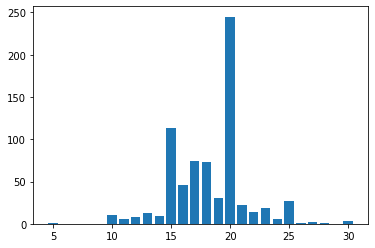

In [52]:
plt.bar(*zip(*dict(Counter(human1_score)).items()))
plt.show()

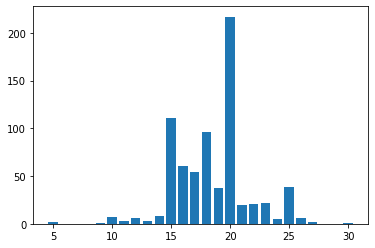

In [53]:
plt.bar(*zip(*dict(Counter(human2_score)).items()))
plt.show()

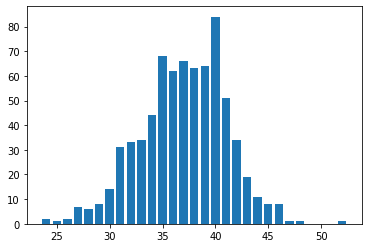

In [54]:
plt.bar(*zip(*dict(Counter(model_score)).items()))
plt.show()

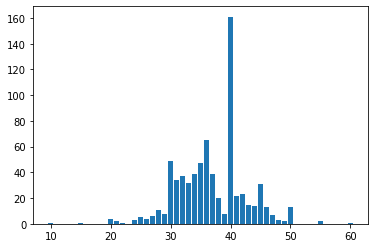

In [55]:
plt.bar(*zip(*dict(Counter(y)).items()))
plt.show()

c:\users\20167947\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


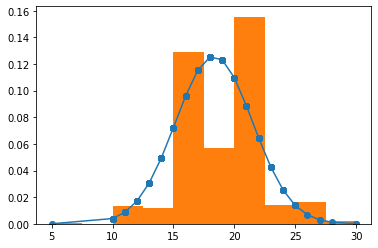

In [56]:
import pylab as pl
import scipy.stats as stats

fit = stats.norm.pdf(a, np.mean(a), np.std(a))  #this is a fitting indeed

pl.plot(a,fit,'-o')

pl.hist(a,normed=True)      #use this to draw histogram of your data

pl.show() 

## Studying model behaviour

### 1. Answer Length

In [57]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap8')
answer_length = x[:,0]

In [58]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(answer_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Answer Length)' % corr)

Pearson's correlation Human-1 : 0.489  (Answer Length)
Pearson's correlation Human-2 : 0.461  (Answer Length)
Pearson's correlation Model : 0.690  (Answer Length)


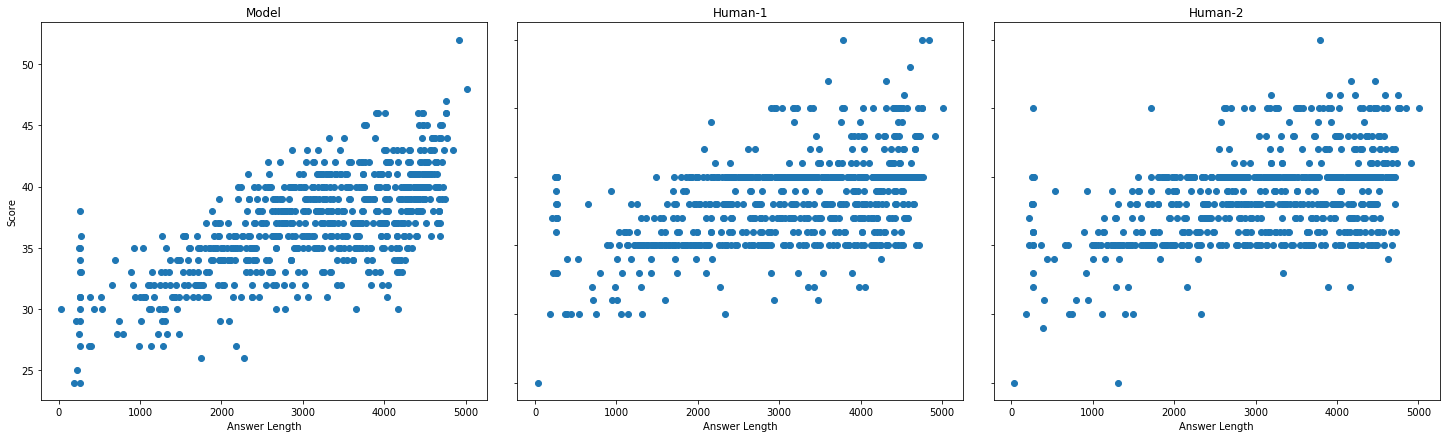

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(answer_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(answer_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(answer_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Answer Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('answer_length.png', bbox_inches="tight")

### 2. Word Counts

In [60]:
word_count = x[:,1]

In [61]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(word_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Word Count)' % corr)

Pearson's correlation Human-1 : 0.461  (Word Count)
Pearson's correlation Human-2 : 0.442  (Word Count)
Pearson's correlation Model : 0.660  (Word Count)


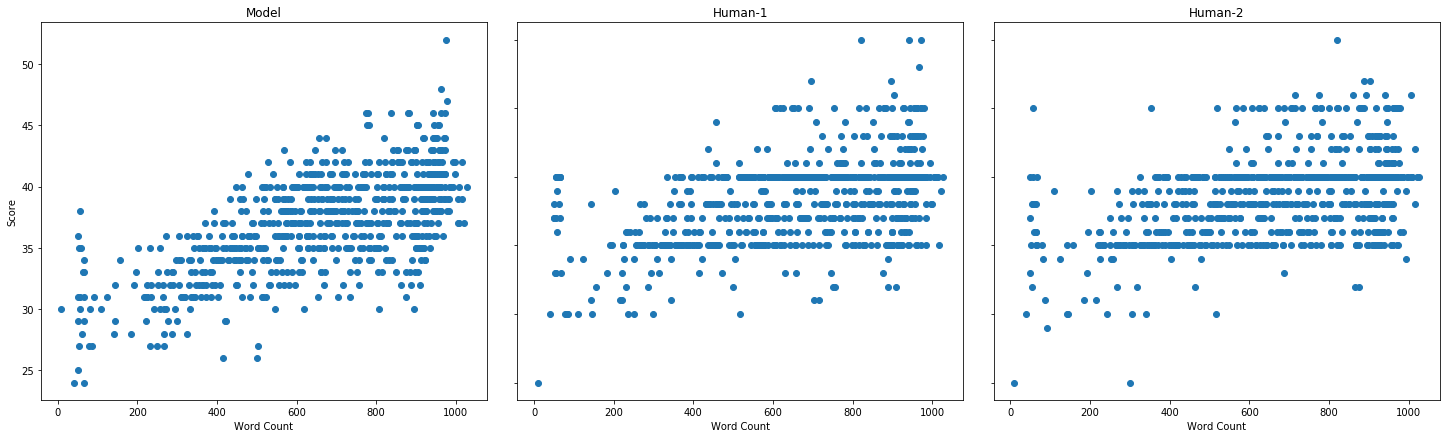

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(word_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(word_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(word_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Word Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('word_count.png', bbox_inches="tight")

### 3. Average Word Length

In [63]:
avg_word_length = x[:,2]

In [64]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(avg_word_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Average Word Length)' % corr)

Pearson's correlation Human-1 : 0.418  (Average Word Length)
Pearson's correlation Human-2 : 0.365  (Average Word Length)
Pearson's correlation Model : 0.509  (Average Word Length)


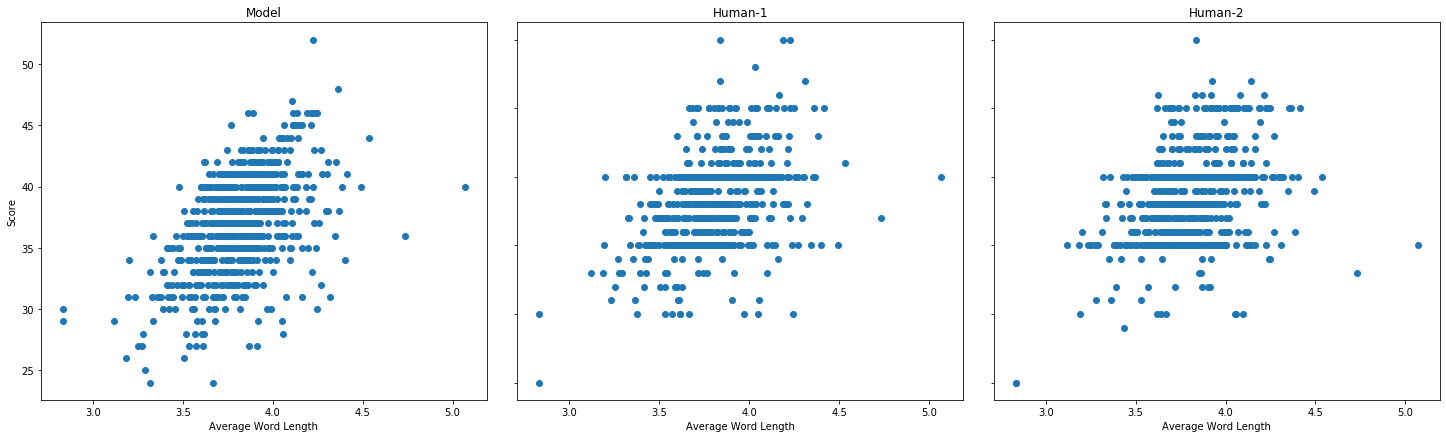

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(avg_word_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(avg_word_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(avg_word_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Average Word Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('avg_word_length.png', bbox_inches="tight")

### 4. Good n-gram

In [66]:
good_ngram = x[:,3]

In [67]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(good_ngram, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, model_score)
print('Pearson\'s correlation Model : %.3f  (Good n-gram)' % corr)

Pearson's correlation Human-1 : 0.462  (Good n-gram)
Pearson's correlation Human-2 : 0.443  (Good n-gram)
Pearson's correlation Model : 0.662  (Good n-gram)


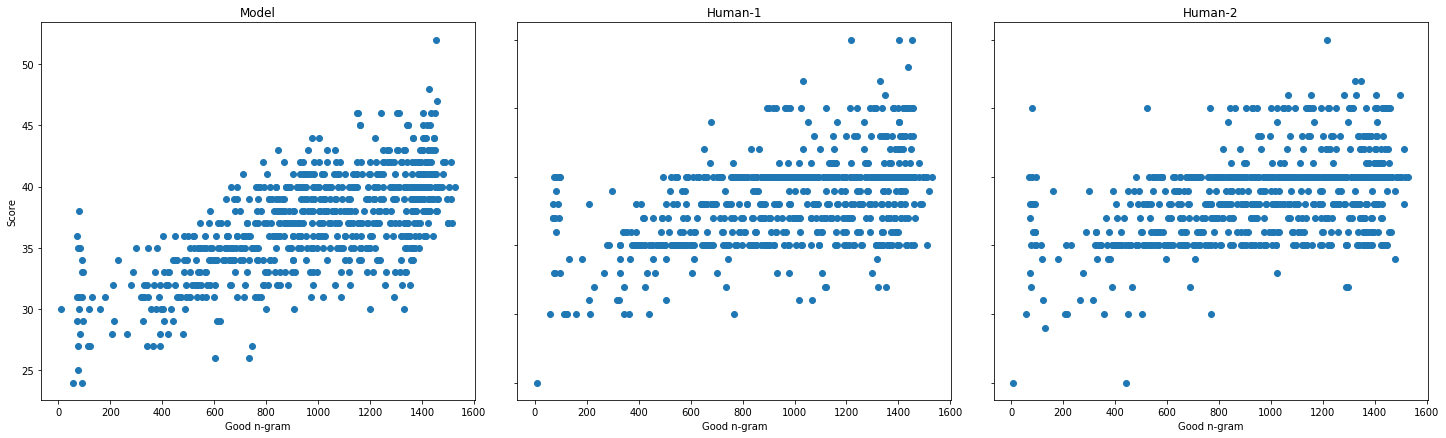

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(good_ngram, model_score)
axs[0].set_title('Model')
axs[1].scatter(good_ngram, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(good_ngram, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Good n-gram', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('good_ngram.png', bbox_inches="tight")

### 5. Prompt Overlap

In [69]:
prompt_overlap = x[:,4]

Pearson's correlation Human-1 : 0.523  (Prompt Overlap)
Pearson's correlation Human-2 : 0.508  (Prompt Overlap)
Pearson's correlation Model : 0.742  (Prompt Overlap)


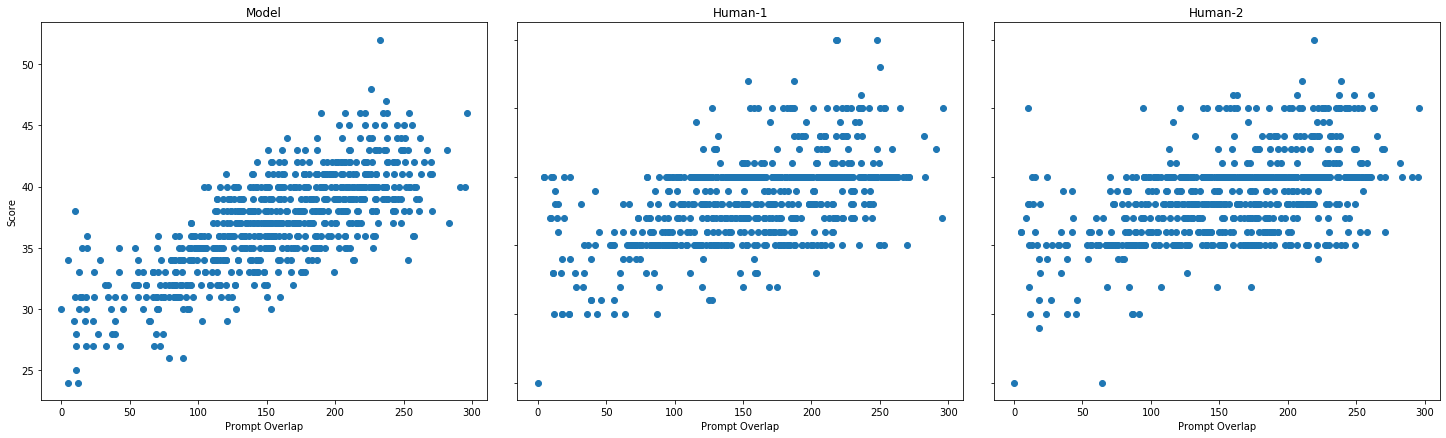

In [70]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap.png', bbox_inches="tight")

### 6. Prompt Overlap (synonym)

In [71]:
prompt_overlap_syn = x[:,5]

Pearson's correlation Human-1 : 0.324  (Prompt Overlap Synonym)
Pearson's correlation Human-2 : 0.344  (Prompt Overlap Synonym)
Pearson's correlation Model : 0.504  (Prompt Overlap Synonym)


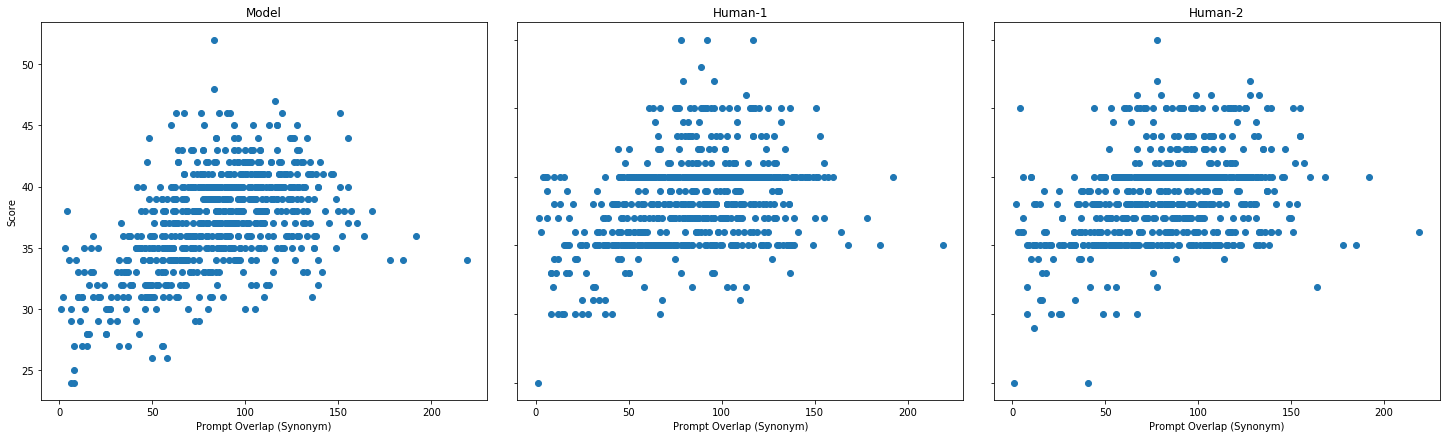

In [72]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap_syn, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap Synonym)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap_syn, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap_syn, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap_syn, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap (Synonym)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap_syn.png', bbox_inches="tight")

### 7. Punctuation Counts

In [73]:
punc_count = x[:,6]

Pearson's correlation Human-1 : 0.526  (Punctuation Count)
Pearson's correlation Human-2 : 0.503  (Punctuation Count)
Pearson's correlation Model : 0.726  (Punctuation Count)


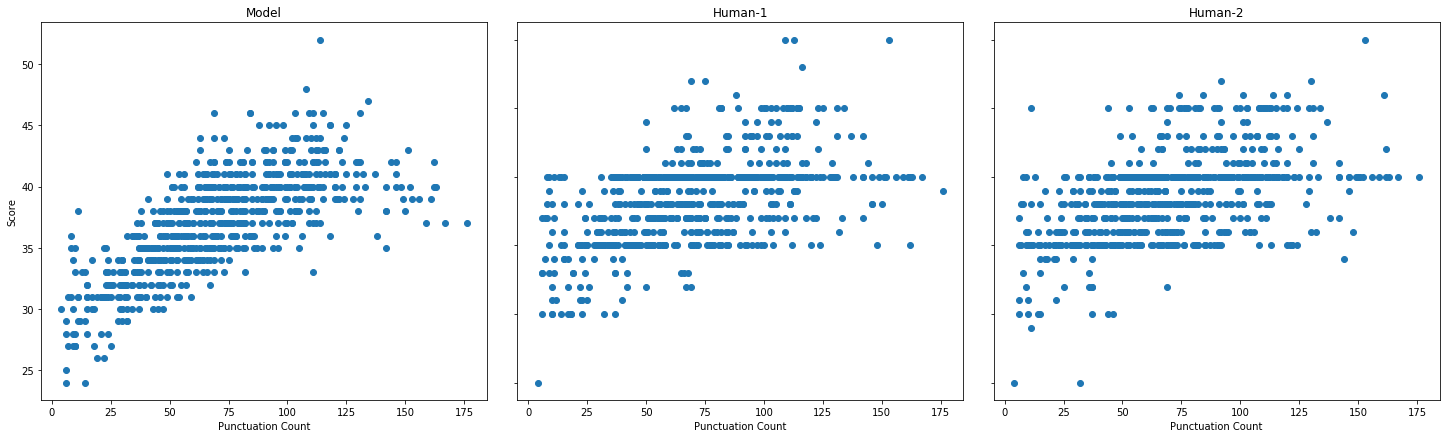

In [74]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(punc_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Punctuation Count)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(punc_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(punc_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(punc_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Punctuation Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('punc_count.png', bbox_inches="tight")

### 8. Spelling Error

In [75]:
spelling_error = x[:,7]

In [76]:
spelling_error

array([0.02993197, 0.00697674, 0.01167728, 0.00132275, 0.0625    ,
       0.01666667, 0.01527495, 0.003125  , 0.0128655 , 0.00474684,
       0.03885481, 0.01315789, 0.02900232, 0.03503185, 0.00648649,
       0.00689655, 0.00998752, 0.00681431, 0.00361882, 0.00306748,
       0.00571429, 0.00744681, 0.04496403, 0.03579176, 0.00507614,
       0.02902375, 0.00872093, 0.00778643, 0.01098901, 0.00620347,
       0.01149425, 0.01248699, 0.00918485, 0.00727651, 0.00524659,
       0.02692308, 0.00874317, 0.00306748, 0.01446281, 0.00521921,
       0.01044386, 0.01142264, 0.00597015, 0.00389105, 0.01204819,
       0.00495868, 0.00744879, 0.00169779, 0.03389831, 0.03174603,
       0.00526316, 0.01062215, 0.00966851, 0.00708383, 0.00301205,
       0.00147493, 0.00534759, 0.00473934, 0.00941915, 0.00547945,
       0.01466276, 0.00228571, 0.00426743, 0.01185185, 0.00417537,
       0.01470588, 0.01369863, 0.0077951 , 0.00671141, 0.01687764,
       0.01483051, 0.00936037, 0.01323251, 0.02428571, 0.03030

Pearson's correlation Human-1 : -0.378  (Spelling Error)
Pearson's correlation Human-2 : -0.358  (Spelling Error)
Pearson's correlation Model : -0.421  (Spelling Error)


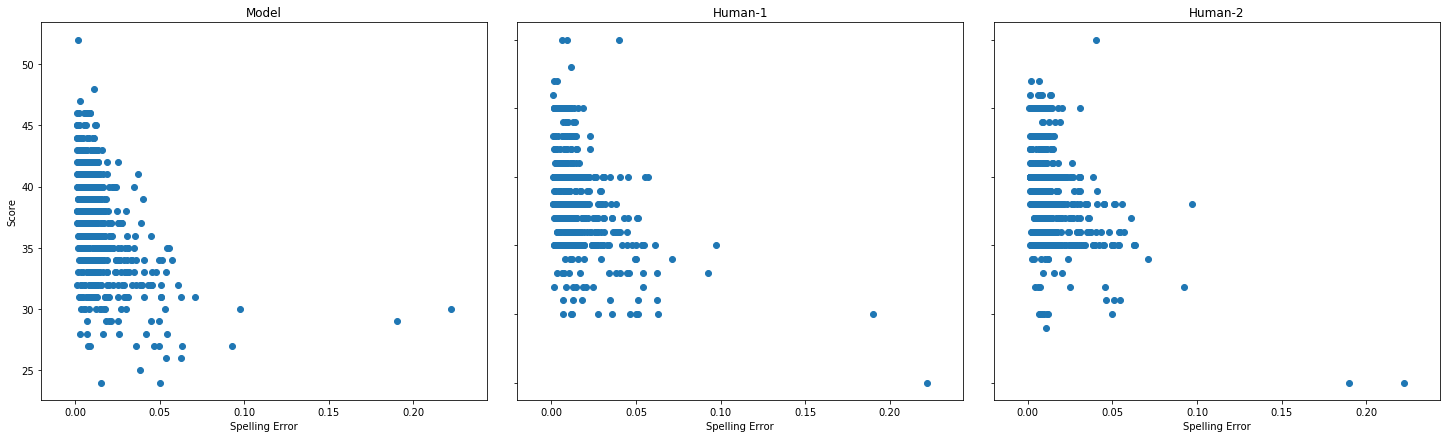

In [77]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(spelling_error, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, model_score)
print('Pearson\'s correlation Model : %.3f  (Spelling Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(spelling_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(spelling_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(spelling_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Spelling Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('spelling_error.png', bbox_inches="tight")

### 9. Unique Words

In [78]:
unique_words = x[:,8]
unique_words

array([219., 297., 306., 245., 169.,  28., 316., 122., 298., 236., 211.,
       352., 232., 185., 320.,  74., 292., 219., 263., 145., 266., 313.,
       189., 255., 182., 232., 259., 277., 111., 287., 209., 232., 291.,
       290., 323., 182., 299., 133., 321., 347., 257., 326., 360., 178.,
       172., 155., 197., 177., 132.,  38., 199., 257., 258., 291., 273.,
       208., 235., 160., 242., 161., 135., 337., 250., 220., 363., 131.,
       216., 241., 203., 146., 295., 235., 169., 211.,  40., 316., 196.,
       330., 183., 124.,  38., 133., 400., 288., 350., 225., 166., 281.,
       253.,  36., 297., 214., 112., 232., 250., 266., 202., 111.,  80.,
       161., 270., 345., 315., 234., 183., 280., 287., 116., 176., 258.,
       231., 189., 212., 294., 240., 218., 299., 192., 264., 283., 279.,
       162.,  43., 271., 194., 246., 244., 267., 309., 270., 307., 199.,
       265., 169., 179., 329., 238., 233., 181., 265., 211., 102., 109.,
       351., 270., 225., 289., 243., 207., 278., 15

Pearson's correlation Human-1 : 0.582  (Unique Words)
Pearson's correlation Human-2 : 0.533  (Unique Words)
Pearson's correlation Model : 0.782  (Unique Words)


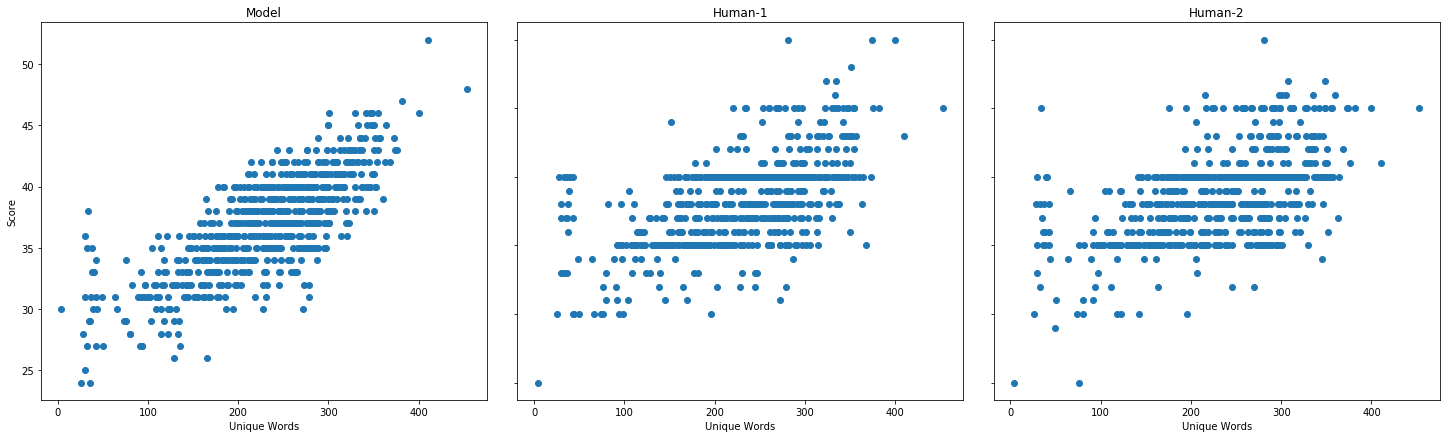

In [79]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(unique_words, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, model_score)
print('Pearson\'s correlation Model : %.3f  (Unique Words)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(unique_words, model_score)
axs[0].set_title('Model')
axs[1].scatter(unique_words, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(unique_words, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Unique Words', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('unique_words.png', bbox_inches="tight")

### 10. Prompt Similarity (SBert)

In [80]:
sbert_similarity = x[:,9]
sbert_similarity

array([0.62918353, 0.65667564, 0.71844697, 0.73263991, 0.49577627,
       0.46016192, 0.64846528, 0.90873438, 0.87377918, 0.85119981,
       0.71965593, 0.56465638, 0.56850523, 0.83204508, 0.73416758,
       0.5788852 , 0.71122533, 0.81257749, 0.78558767, 0.88269114,
       0.54088569, 0.53698593, 0.45262152, 0.58294624, 0.81201357,
       0.70540297, 0.63054466, 0.7977432 , 0.85388815, 0.69572663,
       0.7360965 , 0.7965799 , 0.80520242, 0.58623314, 0.76867956,
       0.76157045, 0.67364496, 0.53869599, 0.61242372, 0.79102337,
       0.62125885, 0.65701413, 0.81762701, 0.84137565, 0.82463944,
       0.56412566, 0.74065059, 0.56152427, 0.59731191, 0.81886709,
       0.83105433, 0.72387028, 0.79527694, 0.82845426, 0.67258918,
       0.84658372, 0.63920653, 0.87524635, 0.82701242, 0.88292384,
       0.81748176, 0.66595477, 0.83750606, 0.71847224, 0.71324891,
       0.69674712, 0.81839192, 0.67407316, 0.73078209, 0.70477676,
       0.82571101, 0.80755091, 0.55074459, 0.89816689, 0.83466

Pearson's correlation Human-1: 0.202 (Prompt Similarity (SBert))
Pearson's correlation Human-2: 0.190 (Prompt Similarity (SBert))
Pearson's correlation Model: 0.289 (Prompt Similarity (SBert))


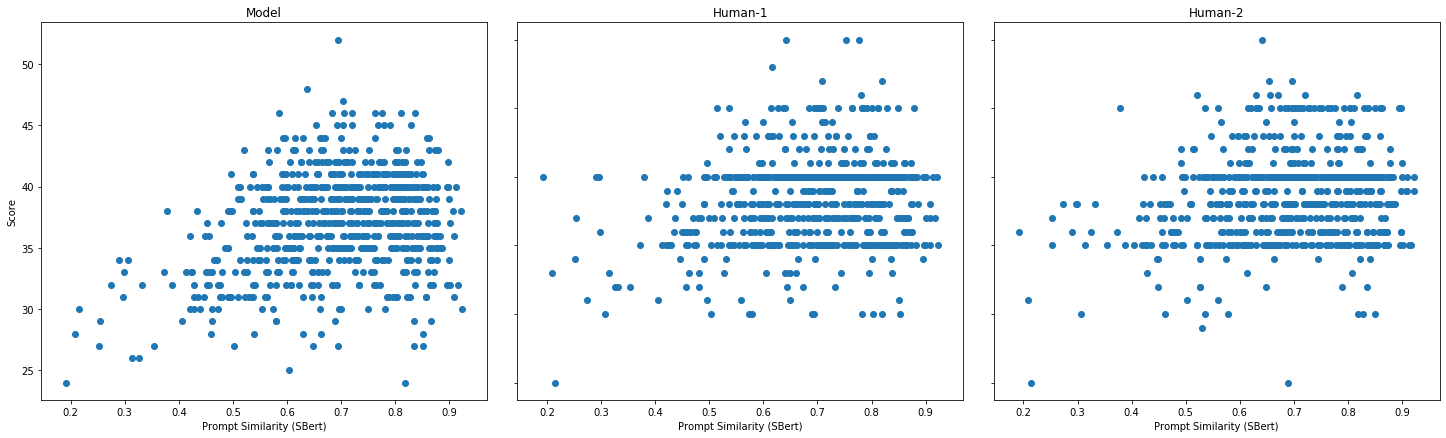

In [81]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(sbert_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (SBert))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(sbert_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(sbert_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(sbert_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (SBert)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('sbert_similarity.png', bbox_inches="tight")

### 11. Prompt Similarity (BOW)

In [82]:
bow_similarity = x[:,10]
bow_similarity

array([0.23615401, 0.20430526, 0.34250844, 0.34972647, 0.17327163,
       0.0208696 , 0.16353282, 0.35956668, 0.48915112, 0.26089544,
       0.48176506, 0.13914243, 0.1754096 , 0.32101762, 0.12324785,
       0.17370208, 0.24823683, 0.33491191, 0.22880689, 0.51396393,
       0.3046274 , 0.2323707 , 0.14580345, 0.29321626, 0.39291501,
       0.28025234, 0.27949103, 0.2670148 , 0.31503096, 0.24777061,
       0.19548242, 0.23171068, 0.39702291, 0.19172872, 0.26197471,
       0.29961225, 0.24052027, 0.2462747 , 0.23204774, 0.3106184 ,
       0.20598742, 0.17098925, 0.27406287, 0.31216766, 0.31127062,
       0.08461438, 0.28815087, 0.29385393, 0.20674419, 0.15762208,
       0.23749386, 0.23465646, 0.4336229 , 0.36110306, 0.29690785,
       0.2042701 , 0.31378892, 0.29480381, 0.39575357, 0.51381031,
       0.33905637, 0.26378526, 0.27878989, 0.14353668, 0.17200069,
       0.5144886 , 0.12312005, 0.33491101, 0.31640862, 0.41898925,
       0.31566922, 0.22779336, 0.2118407 , 0.26842073, 0.39641

Pearson's correlation Human-1: 0.083 (Prompt Similarity (BOW))
Pearson's correlation Human-2: 0.117 (Prompt Similarity (BOW))
Pearson's correlation Model: 0.131 (Prompt Similarity (BOW))


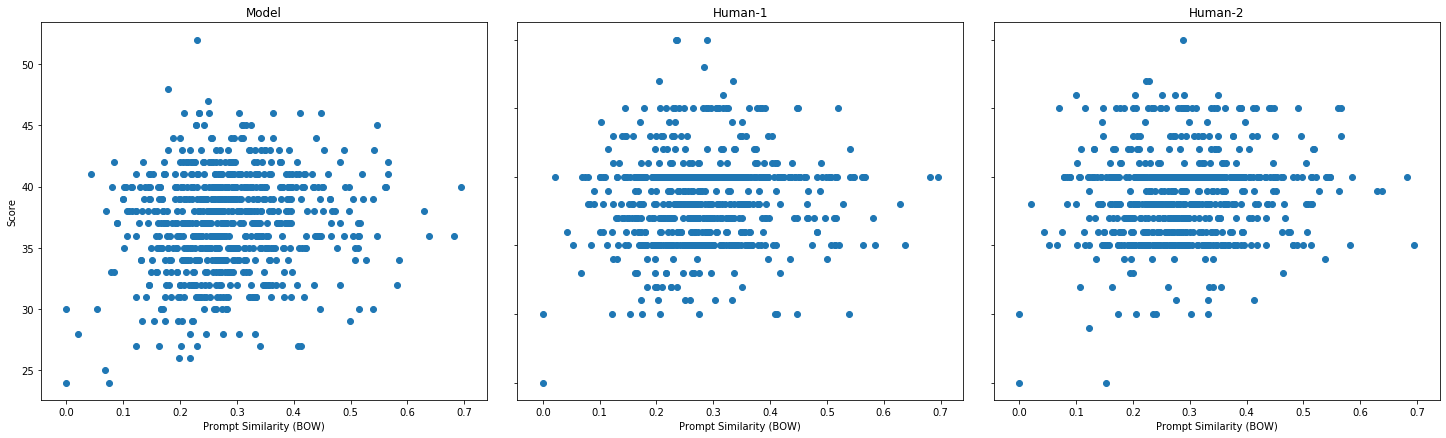

In [83]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(bow_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (BOW))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(bow_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(bow_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(bow_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (BOW)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('bow_similarity.png', bbox_inches="tight")

### 12. Language Error

In [84]:
lang_error = x[:,11]
lang_error

array([0.0188221 , 0.00396727, 0.00716846, 0.01957919, 0.0399045 ,
       0.00803213, 0.00746269, 0.01082544, 0.00097395, 0.00397483,
       0.01357268, 0.00508475, 0.02448554, 0.01      , 0.00589971,
       0.02949062, 0.00600365, 0.00656216, 0.006469  , 0.00128949,
       0.00368777, 0.01410313, 0.02691589, 0.02238806, 0.00369588,
       0.01631368, 0.00446002, 0.00518868, 0.00551181, 0.00925436,
       0.008329  , 0.0058651 , 0.0079001 , 0.00400267, 0.00642446,
       0.01496259, 0.00420757, 0.01084011, 0.0059727 , 0.00382409,
       0.00709622, 0.00503282, 0.01096353, 0.00041649, 0.00869121,
       0.0143575 , 0.00494845, 0.00574713, 0.01727219, 0.0075188 ,
       0.01139385, 0.00893142, 0.00300391, 0.00842912, 0.00286533,
       0.00316156, 0.00495994, 0.0045045 , 0.00229358, 0.00222346,
       0.00782779, 0.00261097, 0.00266904, 0.00377953, 0.0081786 ,
       0.00689655, 0.00903145, 0.0062515 , 0.00566572, 0.0068306 ,
       0.00200312, 0.01269945, 0.00920117, 0.01122155, 0.01824

Pearson's correlation Human-1: -0.491 (Language Error)
Pearson's correlation Human-2: -0.444 (Language Error)
Pearson's correlation Model: -0.578 (Language Error)


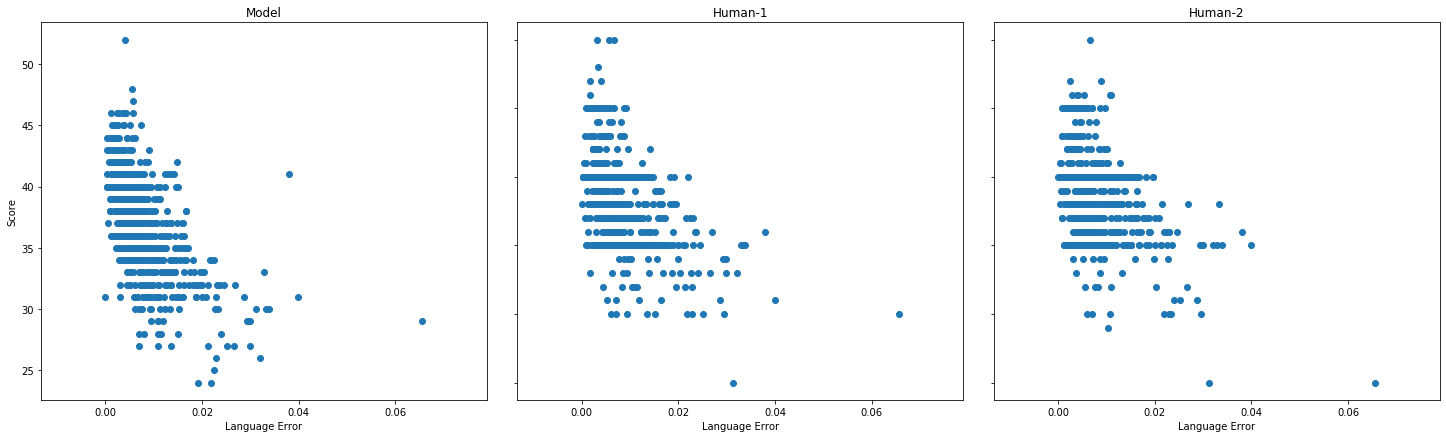

In [85]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(lang_error, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, model_score)
print('Pearson\'s correlation Model: %.3f (Language Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(lang_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(lang_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(lang_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Language Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('lang_error.png', bbox_inches="tight")